# Integrator

This demo implements a one-dimensional neural integrator.

This is the first example of a recurrent network in the demos.
It shows how neurons can be used to implement stable dynamics.
Such dynamics are important for memory, noise cleanup,
statistical inference, and many other dynamic transformations.

When you run this demo, it will automatically
put in some step functions on the input,
so you can see that the output is integrating
(i.e. summing over time) the input.
You can also input your own values.
Note that since the integrator constantly sums its input,
it will saturate quickly if you leave the input non-zero.
This makes it clear that neurons have a finite range of representation.
Such saturation effects can be exploited
to perform useful computations (e.g. soft normalization).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nengo
from nengo.processes import Piecewise

## Step 1: Create the neural populations

Our model consists of one recurrently connected ensemble,
and an input population.

In [2]:
tau = 0.1

integrator = nengo.networks.Integrator(tau, n_neurons=100, dimensions=1)

## Step 2: Create input for the model

We will use a piecewise step function as input,
so we can see the effects of recurrence.

In [3]:
with integrator:
    input = nengo.Node(Piecewise({0: 0, 0.2: 1, 1: 0, 2: -2, 3: 0, 4: 1, 5: 0}))

## Step 3: Connect the network elements

In [4]:
# Connect the input
with integrator:
    nengo.Connection(input, integrator.input, synapse=tau)

## Step 4: Probe outputs

Anything that is probed will collect the data it produces over time,
allowing us to analyze and visualize it later.

In [5]:
with integrator:
    input_probe = nengo.Probe(input)
    integrator_probe = nengo.Probe(integrator.ensemble, synapse=0.01)  # 10ms filter

## Step 5: Run the model

In [6]:
# Create our simulator
with nengo.Simulator(integrator) as sim:
    # Run it for 6 seconds
    sim.run(6)

## Step 6: Plot the results

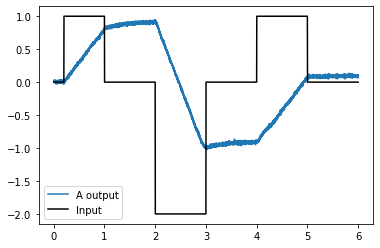

In [7]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[integrator_probe], label="A output")
plt.plot(sim.trange(), sim.data[input_probe], "k", label="Input")
plt.legend(loc="best")

The graph shows the response to the input by the integrator.
Because it is implemented in neurons,
it will not be perfect (i.e. there will be drift).
Running several times will give a sense of
the kinds of drift you might expect.
Drift can be reduced by increasing the number of neurons.